### У цьому завданні вам потрібно завантажити ось [цей](https://drive.google.com/file/d/1Zvz20Iqeia1eEtFbGa3NcIrt_SNSimP6/view?usp=share_link) датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

### Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

In [90]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## Load

In [2]:
from pathlib import Path
from urllib.request import urlretrieve
import zipfile

URL = "https://drive.usercontent.google.com/download?id=1Zvz20Iqeia1eEtFbGa3NcIrt_SNSimP6&export=download"

FILE_NAME = Path('content/data.zip')
FOLDER_NAME = Path('content/data')

In [5]:
urlretrieve(URL, FILE_NAME)

with zipfile.ZipFile(FILE_NAME, 'r') as zipfp:
    zipfp.extractall(FOLDER_NAME.parent)

In [3]:
df_2d = pd.read_csv(FOLDER_NAME / 'data_2d.csv', header=None, names=['X', 'Y', 'Z'])
df_2d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       200 non-null    float64
 1   Y       200 non-null    float64
 2   Z       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [4]:
df_mnist = pd.read_csv(FOLDER_NAME / 'mnist.csv', header=None)
df_mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 3.0 MB


### Двовимірний датасет

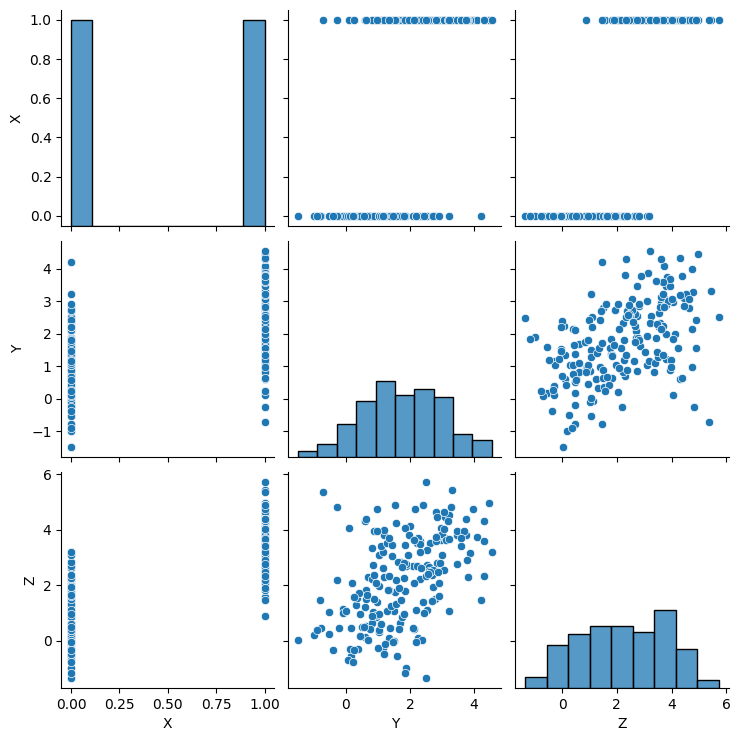

In [8]:
sns.pairplot(df_2d)
plt.show()

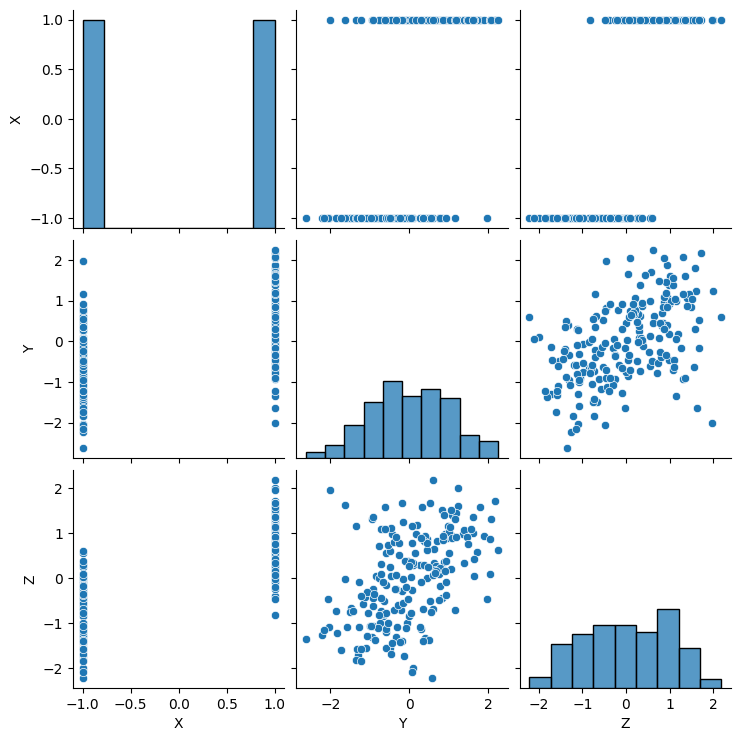

In [22]:
df_2d_scaled = pd.DataFrame(StandardScaler().fit_transform(df_2d), columns=df_2d.columns)

sns.pairplot(df_2d_scaled)
plt.show()

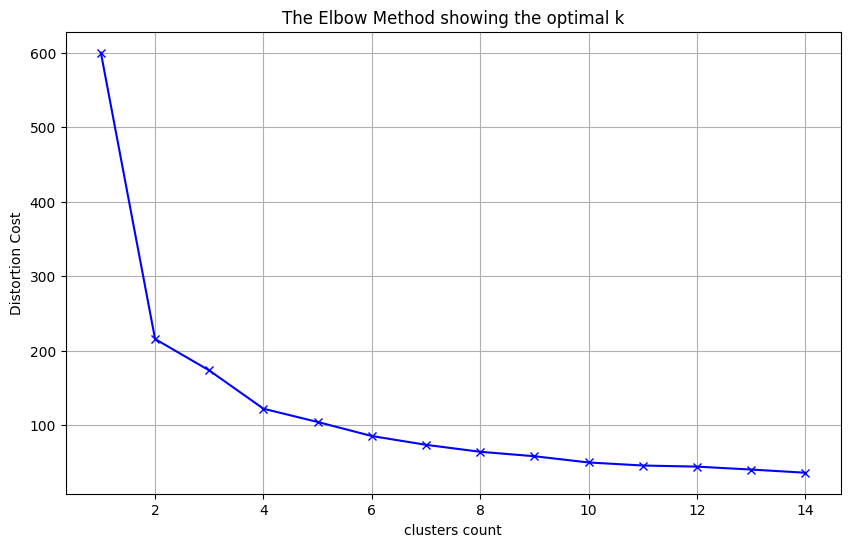

In [63]:
clusters_range = range(1, 15)
distortion_cost = []

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_2d_scaled)
    distortion_cost.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(clusters_range, distortion_cost, 'bx-')
plt.xlabel('clusters count')
plt.ylabel('Distortion Cost')
plt.title('The Elbow Method showing the optimal k')
plt.grid()
plt.show()

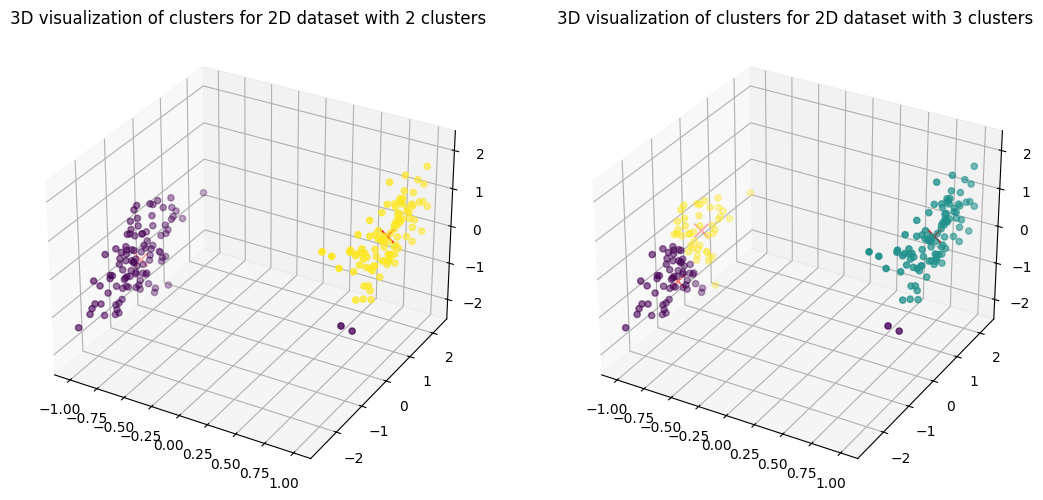

In [32]:
check_clusters = [2, 3]
result = {}

figure = plt.figure(figsize=(20, 6))

for k in check_clusters:
    ax =plt.subplot(1, 3, check_clusters.index(k) + 1, projection='3d')
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_2d_scaled)

    result[k] = {"cluster_centers": kmeans.cluster_centers_, "labels": kmeans.labels_}
    df_2d_clustered = df_2d_scaled.copy()
    df_2d_clustered['cluster'] = kmeans.labels_

    ax.scatter(df_2d_clustered['X'], df_2d_clustered['Y'], df_2d_clustered['Z'], c=df_2d_clustered['cluster'], cmap='viridis')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], color='red' , marker='x', s=100)
    plt.title(f'3D visualization of clusters for 2D dataset with {kmeans.n_clusters} clusters')
    
plt.show()

In [64]:
result

{2: {'cluster_centers': array([[-0.96078431, -0.54301659, -0.79258183],
         [ 1.        ,  0.56518053,  0.82493211]]),
  'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1])},
 3: {'cluster_centers': array([[-0.93220339, -1.02259182, -1.05840943],
         [ 1.        ,  0.56518053,  0.82493211],
         [-1.        ,  0.11500525, -0.42784163]]),

Change dimension for 2d visulization

In [65]:
pca = PCA(n_components=2)
df_2d_pca = pca.fit_transform(df_2d_scaled)
df_2d_pca = pd.DataFrame(df_2d_pca, columns=['X', 'Y'])

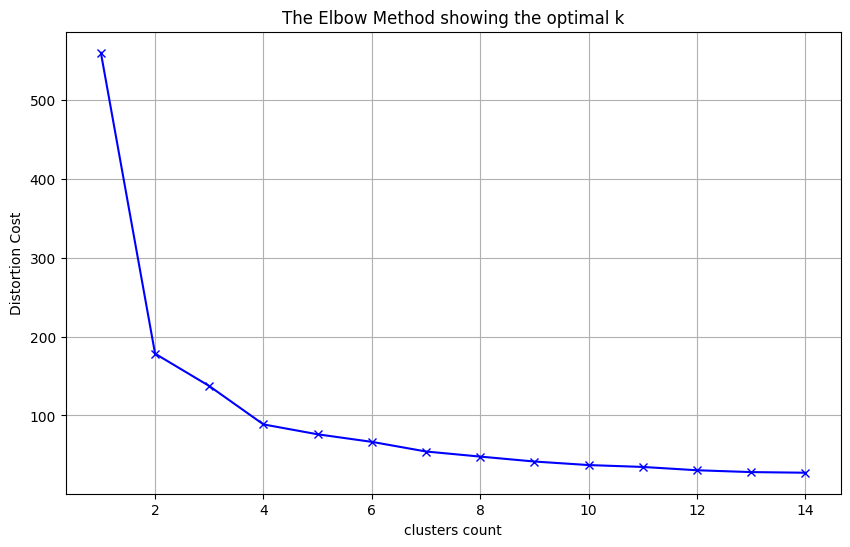

In [44]:
distortion_cost = []

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_2d_pca)
    distortion_cost.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(clusters_range, distortion_cost, 'bx-')
plt.xlabel('clusters count')
plt.ylabel('Distortion Cost')
plt.title('The Elbow Method showing the optimal k using PCA')
plt.grid()
plt.show()

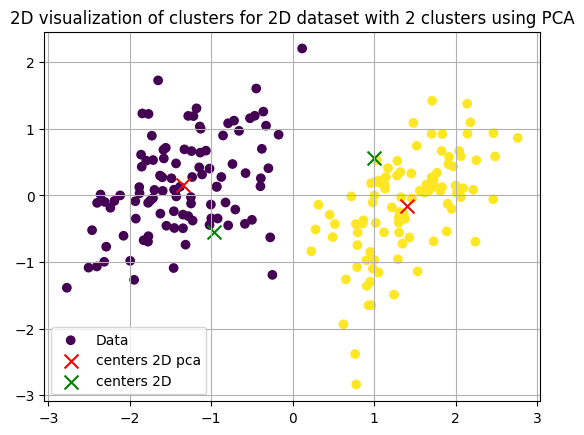

array([[-1.3444781 ,  0.15541593],
       [ 1.39935476, -0.16175943]])

In [66]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_2d_pca)

plt.scatter(df_2d_pca['X'], df_2d_pca['Y'], c=kmeans.labels_, label="Data")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red' , marker='x', s=100, label="centers 2D pca")
plt.scatter(result[2]["cluster_centers"][:, 0], result[2]["cluster_centers"][:, 1], color='green' , marker='x', s=100, label="centers 2D")
plt.title(f'2D visualization of clusters for 2D dataset with {kmeans.n_clusters} clusters using PCA')
plt.grid()
plt.legend()
plt.show()

kmeans.cluster_centers_


!! Check if not use column X

In [67]:
df_2d_scaled['X'].unique()

array([-1.,  1.])

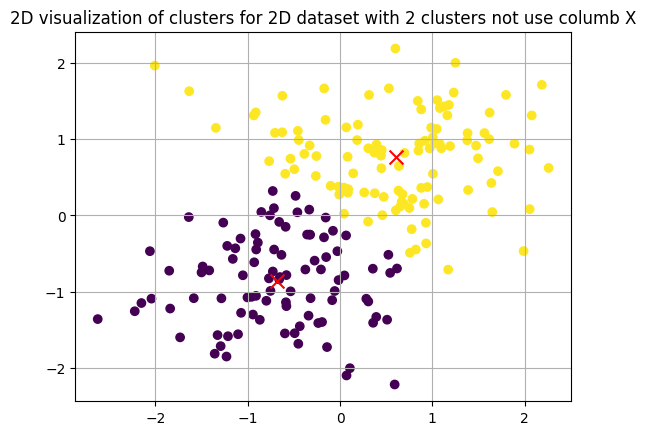

array([[-0.68019363, -0.86584966],
       [ 0.60319058,  0.76782894]])

In [35]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_2d_scaled[['Y', 'Z']])

plt.scatter(df_2d_scaled['Y'], df_2d_scaled['Z'], c=kmeans.labels_, label="Data")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red' , marker='x', s=100, label="centers 2D")
plt.title(f'2D visualization of clusters for 2D dataset with {kmeans.n_clusters} clusters not use columb X')
plt.grid()
plt.show()

kmeans.cluster_centers_



### MNIST датасет

In [39]:
df_mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df_mnist_scaled = pd.DataFrame(StandardScaler().fit_transform(df_mnist))

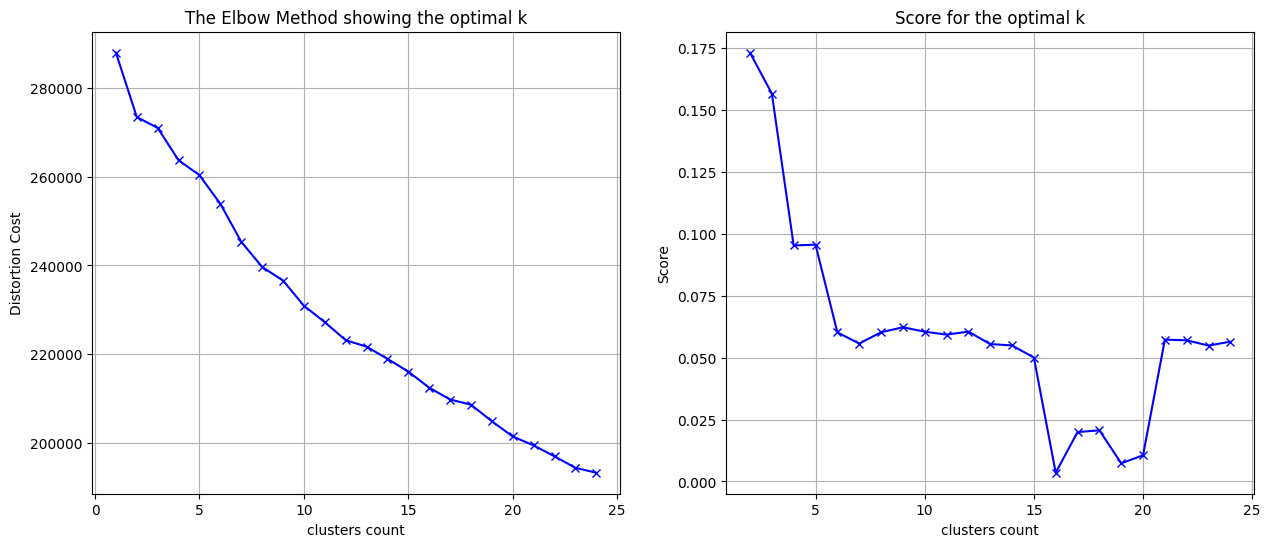

In [154]:
clusters_range = range(1, 25)
distortion_cost = []
scores = []

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_mnist_scaled)
    distortion_cost.append(kmeans.inertia_)
    if k > 1:
        scores.append(silhouette_score(df_mnist_scaled, kmeans.labels_))
    else:
        scores.append(float('inf'))

plt.figure(figsize=(15, 6))


plt.subplot(1, 2, 1)
plt.plot(clusters_range, distortion_cost, 'bx-')
plt.xlabel('clusters count')
plt.ylabel('Distortion Cost')
plt.title('The Elbow Method showing the optimal k')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(clusters_range, scores, 'bx-')
plt.xlabel('clusters count')
plt.ylabel('Score')
plt.title('Score for the optimal k')
plt.grid()

plt.show()

In [139]:
pca = PCA(n_components=2)
df_minist_pca = pd.DataFrame(pca.fit_transform(df_mnist_scaled))

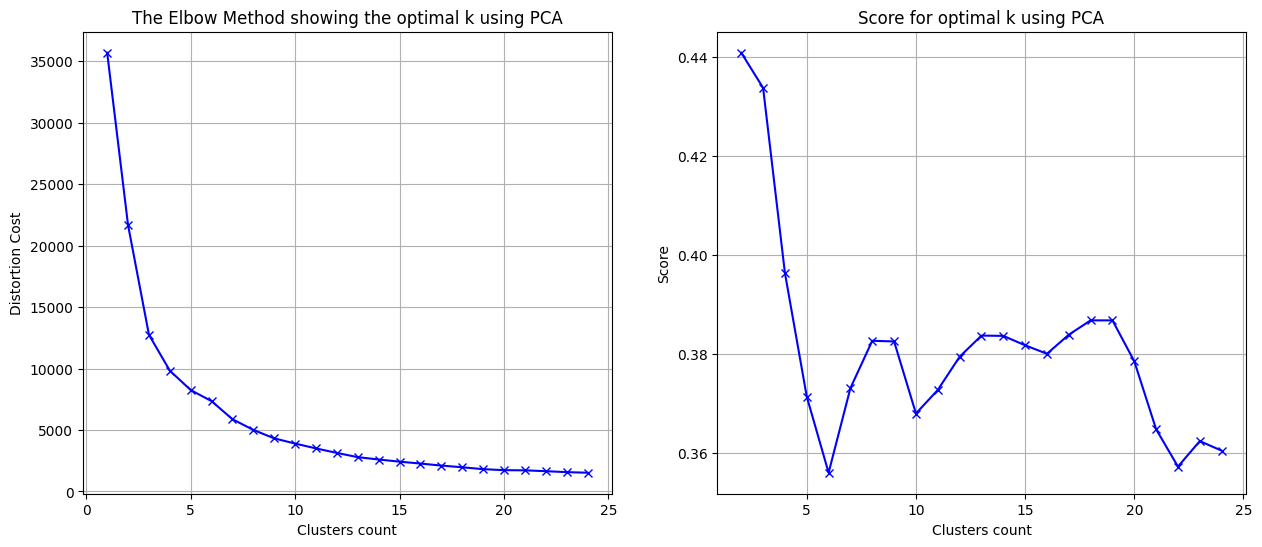

In [140]:
distortion_cost = []
scores = []

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_minist_pca)
    distortion_cost.append(kmeans.inertia_)
    if k > 1:
        scores.append(silhouette_score(df_minist_pca, kmeans.labels_))
    else:
        scores.append(float('inf'))


plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(clusters_range, distortion_cost, 'bx-')
plt.xlabel('Clusters count')
plt.ylabel('Distortion Cost')
plt.title('The Elbow Method showing the optimal k using PCA')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(clusters_range, scores, 'bx-')
plt.xlabel('Clusters count')
plt.ylabel('Score')
plt.title('Score for optimal k using PCA')
plt.grid()
plt.show()

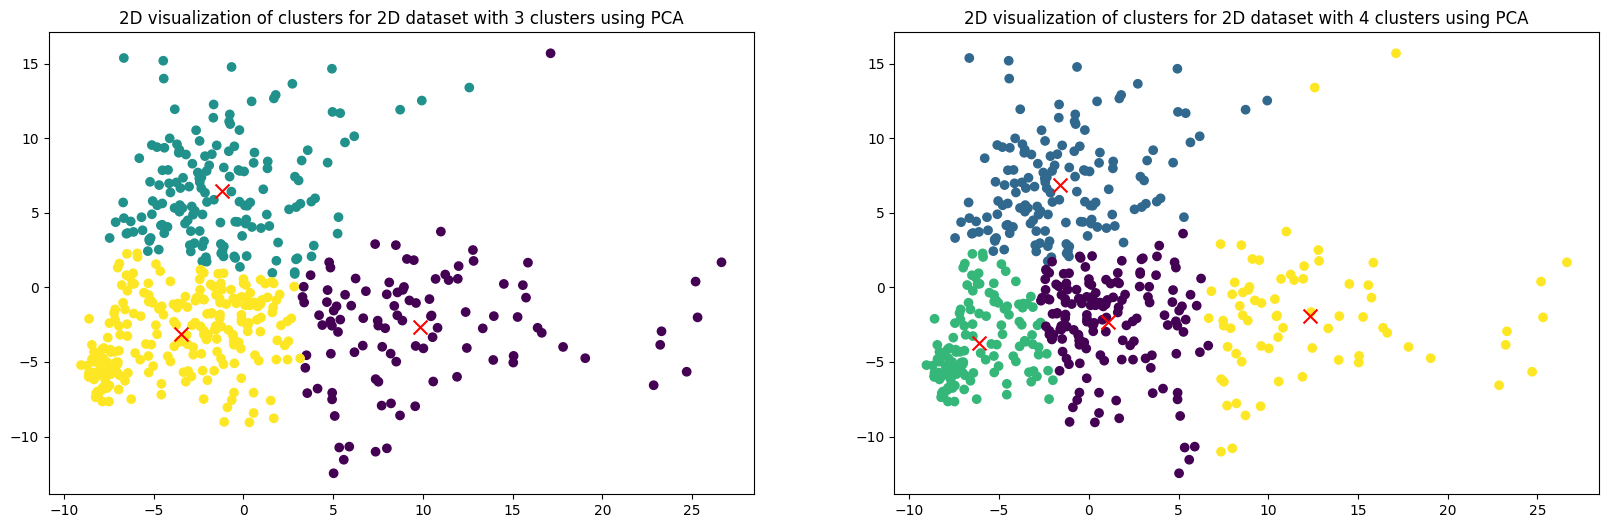

In [152]:
check_clusters = [3, 4]
result = {}

figure = plt.figure(figsize=(20, 6))

for k in check_clusters:
    ax =plt.subplot(1, 2, check_clusters.index(k) + 1)
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_minist_pca)

    result[k] = {"cluster_centers": kmeans.cluster_centers_, "labels": kmeans.labels_}
    df_minist_clustered = df_minist_pca.copy()
    df_minist_clustered['cluster'] = kmeans.labels_

    ax.scatter(df_minist_clustered[0], df_minist_clustered[1], c=df_minist_clustered['cluster'], cmap='viridis')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red' , marker='x', s=100)
    plt.title(f'2D visualization of clusters for 2D dataset with {kmeans.n_clusters} clusters using PCA')
    
plt.show()

Maybe optimal cluster (Elbow Method)

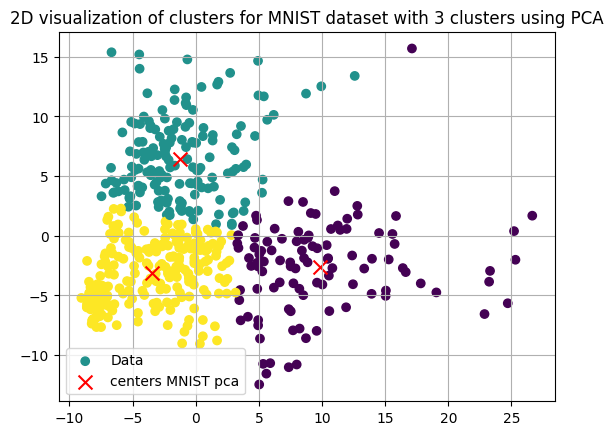

In [146]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_minist_pca)

plt.scatter(df_minist_pca[0], df_minist_pca[1], c=kmeans.labels_, label="Data")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red' , marker='x', s=100, label="centers MNIST pca")
plt.title(f'2D visualization of clusters for MNIST dataset with {kmeans.n_clusters} clusters using PCA')
plt.grid()
plt.legend()
plt.show()

Maybe optimal cluster (look "Score for the optimal k using PCA" )

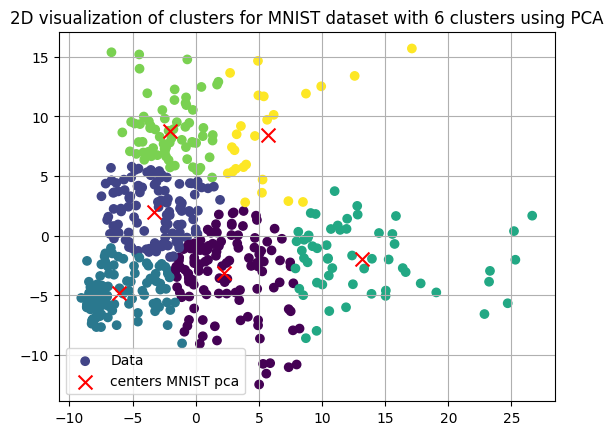

In [149]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(df_minist_pca)

plt.scatter(df_minist_pca[0], df_minist_pca[1], c=kmeans.labels_, label="Data")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red' , marker='x', s=100, label="centers MNIST pca")
plt.title(f'2D visualization of clusters for MNIST dataset with {kmeans.n_clusters} clusters using PCA')
plt.grid()
plt.legend()
plt.show()

Maybe optimal cluster (look "Score for the optimal k" not use PCA )

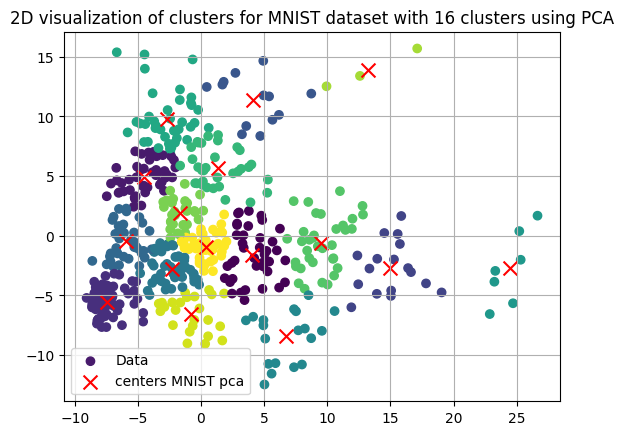

In [155]:
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(df_minist_pca)

plt.scatter(df_minist_pca[0], df_minist_pca[1], c=kmeans.labels_, label="Data")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red' , marker='x', s=100, label="centers MNIST pca")
plt.title(f'2D visualization of clusters for MNIST dataset with {kmeans.n_clusters} clusters using PCA')
plt.grid()
plt.legend()
plt.show()

Maybe optimal clusters = 6

How find optimal n_component PCA ?